(320, 456, 3)
(500, 3)
[[ 23]
 [ 75]
 [  3]
 ...
 [  1]
 [213]
 [367]]


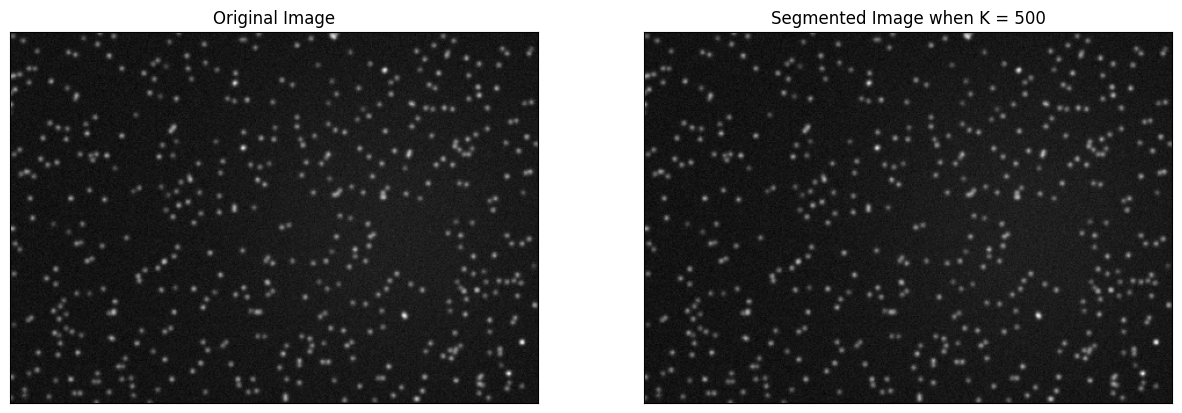

In [7]:
import cv2
import numpy as np

def pngreader(filepath):
    imA = cv2.imread(filepath,-1)
    print(imA.shape)
    return imA

import matplotlib.pyplot as plt
def clusterimage(image):
    vectorized = image.reshape((-1,3))
    vectorized = np.float32(vectorized)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 500
    attempts=10
    ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    print(center.shape)
    print(label)

    res = center[label.flatten()]
    result_image = res.reshape((image.shape))
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1,2,2)
    plt.imshow(result_image)
    plt.title('Segmented Image when K = %i' % K)
    plt.xticks([])
    plt.yticks([])

def main():
    image=pngreader("C:/Users/evgen/Downloads/2712_1.png")
    clusterimage(image)
    plt.show()


if __name__ == '__main__':
    main()

